In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from solvers import ValueIteration
from rocky_road import RockyRoad
from env_wrapper import EnvironmentWrapper

In [7]:
def analyze_policy(env, policy):
    severities = [i for i in range(env.max_acc_sev)]
    actions, action_names = env.actions, env.action_names
    action_data = {f"{action_names[action]}": np.zeros(len(severities)) for action in actions}

    # bar chart
    for state, action in policy.items(): 
        if state not in env.goal_states and state not in env.terminal_states: 
            env_state, sev_lvl = state
            sev_idx = severities.index(sev_lvl) 
            act_name = action_names[action]
            action_data[act_name][sev_idx] += 1



# scatter plot of policy
def plot_policy_scatter(env, policy):
    env_states = []
    sevs = []
    for state in env.states: 
        env_state, sev = state 
        if env_state not in env_states: 
            env_states.append(env_state)
        if sev not in sevs: 
            sevs.append(sev)

    colors = ['g', 'y', 'c', 'b', 'r', 'k']

    xticks = sevs 
    yticks = list(set([state[0][1] for state in env.states]))

    fig = plt.figure(figsize=(8,12))
    ax = fig.add_subplot(111)
    ax.set_ylabel('Environmental state')
    ax.set_xlabel('Severity')
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)

    data = {action: [] for action in env.actions}
    for state, action in policy.items(): 
        if state in policy and state not in env.goal_states and state not in env.terminal_states: 
            data[action].append(state)

    for action in env.actions: 
        states = data[action]
        if len(states) != 0: 
            xs = [state[1] for state in states]
            ys = [state[0][1] for state in states]
            cs = [colors[action]] * len(xs) 

            ax.scatter(xs, ys, c=cs, alpha=1, s=100, label=f"Action {action}")

    #ax.legend([f"Action {i}" for i in env.actions])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          fancybox=True, shadow=True, ncol=5)
    #ax.legend()
    plt.show()

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19)]
0 {'cost': 5, 'success_rate': 0.75, 'direction': 0}
1 {'cost': 4, 'success_rate': 0.675, 'direction': 0}
2 {'cost': 3, 'success_rate': 0.6075, 'direction': 0}
3 {'cost': 2, 'success_rate': 0.5467500000000001, 'direction': 0}
4 {'cost': 1, 'success_rate': 0.49207500000000004, 'direction': 0}
['RRPLLRRRLLLPRRRPRRRL', 'SAAAAAAAAAAAAAAAAAAG', 'PRLPRPPLPLLRRRLPPPLR']


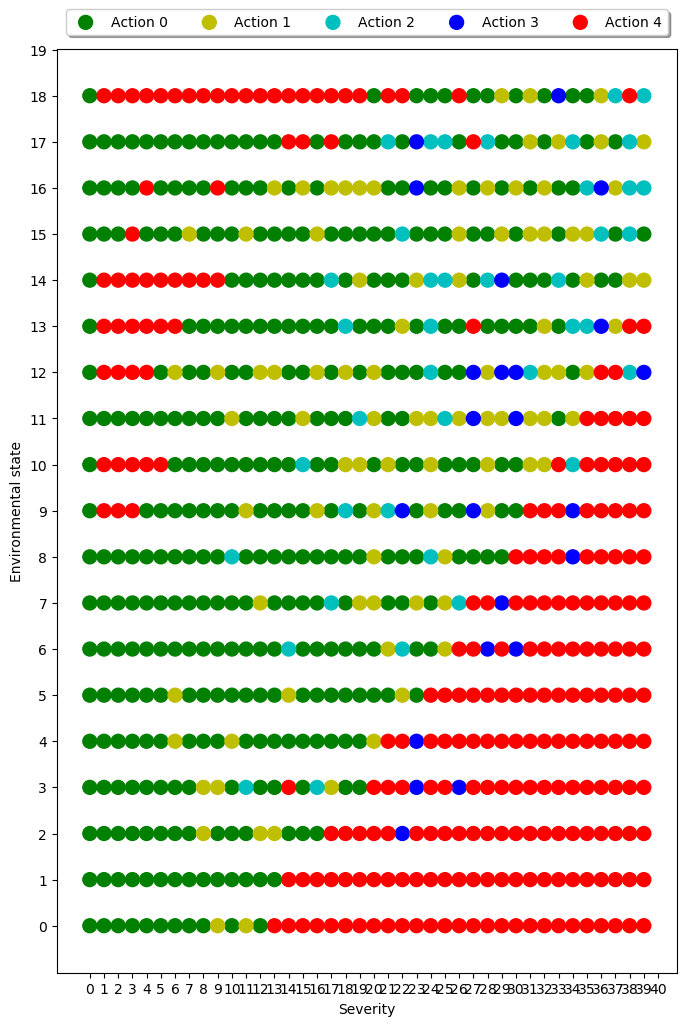

In [41]:
ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.65, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.95,
    "severity_decline_factor": 0.85,
    "skew_factor": 2,
    "goal_reward": 700,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 6,
    "action_costs": 1*[1, 2, 4, 8, 16, 32],
    "nom_success_rate": 0.8, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.9,
    "severity_decline_factor": 1,
    "skew_factor": 2,
    "goal_reward": 200,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 40,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.2,
}

ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": list(0.5*np.array([1.0, 2.0, 4.0, 8.0, 16.0])),
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.8, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.8,
    "severity_decline_factor": 1,
    "skew_factor": 1,
    "goal_reward": 250,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 25,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "terminal_penalty_weight": 10,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}


ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 2*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.65, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.95,
    "severity_decline_factor": 1,
    "skew_factor": 2,
    "goal_reward": 1200,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 15,
    "query_cost": 1,
    "severity_penalty_weight": 10,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}

ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.35, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.95,
    "severity_decline_factor": 1,
    "skew_factor": 1,
    "goal_reward": 1700,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 20,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}


ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.35, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.95,
    "severity_decline_factor": 1.35,
    "skew_factor": 2,
    "goal_reward": 1700,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 40,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}


ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.35, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.95,
    "severity_decline_factor": 1,
    "skew_factor": 2,
    "goal_reward": 1700,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 40,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}

ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.9, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.95,
    "severity_decline_factor": 0.99,
    "skew_factor": 2,
    "goal_reward": 1700,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 40,
    "query_cost": 1,
    "severity_penalty_weight": 15,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}


ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.45, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.9,
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "goal_reward": 4000,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 30,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}


ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.35, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.95,
    "severity_decline_factor": 1.35,
    "skew_factor": 2,
    "goal_reward": 1700,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 40,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}



####
ENV_INFO =  {   
    "length": 15,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    "action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.75, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.85,
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "goal_reward": 400,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 35,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}



ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.75, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.85,
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "goal_reward": 400,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 50,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}

ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    "action_costs": 1*[2, 4, 8, 16, 32],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.7, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.8,
    "severity_decline_factor": 0.9,
    "skew_factor": 1,
    "goal_reward": 1000,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 20,
    "query_cost": 1,
    "severity_penalty_weight": 2,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}



ENV_INFO =  {   
    "length": 40,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    "action_costs": 1*[2, 4, 8, 16, 32],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.85, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.95,
    "severity_decline_factor": 0.9,
    "skew_factor": 1,
    "goal_reward": 3000,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 20,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}


ENV_INFO =  {   
    "length": 40,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    "action_costs": 1*[2, 4, 8, 16, 32],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.8, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.95,
    "severity_decline_factor": 0.9,
    "skew_factor": 1,
    "goal_reward": 3000,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 20,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}


ENV_INFO =  {   
    "length": 40,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    "action_costs": 1*[2, 4, 8, 16, 32],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.7, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.95,
    "severity_decline_factor": 0.9,
    "skew_factor": 1,
    "goal_reward": 10000,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 30,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}






ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    "action_costs": 1*[2, 4, 8, 16, 32],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 105, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.9, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.85,
    "severity_decline_factor": 0.6,
    "skew_factor": 1,
    "goal_reward": 5000,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 28,
    "query_cost": 1,
    "severity_penalty_weight": 10,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
    "alpha": 0.85,
}

ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    "action_costs": 1*[2, 4, 8, 16, 32],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 105, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.8, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.85,
    "severity_decline_factor": 1,
    "skew_factor": 1,
    "goal_reward": 500,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "max_acc_sev": 28,
    "query_cost": 1,
    "severity_penalty_weight": 10,
    "recovery_rate": 0,
    "true_obs_prob": 0.2,
    "alpha": 0.85,
}


ENV_INFO =  {   
    "length": 40,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": 1*[2, 4, 8, 16, 32],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 105, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.5, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.8,
    "goal_reward": 1000,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 30,
    "query_cost": 1,
    "severity_penalty_weight": 50,
    "recovery_rate": 0,
    "true_obs_prob": 0.2,
    "alpha": 0.85,
}



ENV_INFO =  {   
    "length": 30,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    "action_costs": list(1*np.array([2, 4, 8, 16, 32])),
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 105, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.9, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.75,
    "goal_reward": 100,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 30,
    "query_cost": 1,
    "severity_penalty_weight": 10,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
    "alpha": 0.85,
}


ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": list(0.1*np.array([2, 4, 8, 16, 32])),
    "action_costs": [1,2,3,4,5],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 105, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.9, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.9,
    "goal_reward": 100,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 10,
    "query_cost": 10,
    "severity_penalty_weight": 0,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
    "alpha": 0.85,
}


ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": list(0.1*np.array([2, 4, 8, 16, 32])),
    "action_costs": [1,2,3,4,5],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 105, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.9, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.9,
    "goal_reward": 100,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 10,
    "query_cost": 1,
    "severity_penalty_weight": 0,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
    "alpha": 0.85,
}

ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": list(0.1*np.array([2, 4, 8, 16, 32])),
    "action_costs": [1,2,3,4,5],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 105, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.8, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.90,
    "goal_reward": 150,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 10,
    "query_cost": 1,
    "severity_penalty_weight": 15,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
    "alpha": 0.85,
}

ENV_INFO =  {   
    "length": 10,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.8, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.85,
    "goal_reward": 100,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 15,
    "query_cost": 1,
    "severity_penalty_weight": 3,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}


ENV_INFO =  {   
    "length": 10,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    #"action_costs": [1,2,3,4,5],
    "nom_success_rate": 0.75, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.85,
    "goal_reward": 100,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 15,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}


ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": list(0.1*np.array([2, 4, 8, 16, 32])),
    "action_costs": [1, 2, 3, 4, 5],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 105, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.9, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.9,
    "goal_reward": 100,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 10,
    "query_cost": 1,
    "severity_penalty_weight": 0,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
    "alpha": 0.85,
}

ENV_INFO =  {   
    "length": 10,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.8, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.85,
    "goal_reward": 100,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 15,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}


ENV_INFO =  {   
    "length": 15,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    "action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.8, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.85,
    "goal_reward": 120,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 15,
    "query_cost": 1,
    "severity_penalty_weight": 0,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}



ENV_INFO =  {   
    "length": 10,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": [1, 3, 6, 10, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "action_costs": [1,2,3,4,5],
    "nom_success_rate": 0.7, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.85,
    "goal_reward": 50,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 15,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
}



ENV_INFO =  {   
    "length": 20,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": list(0.1*np.array([2, 4, 8, 16, 32])),
    "action_costs": [1, 2, 3, 4, 5],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 105, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.75, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.9,
    "goal_reward": 100,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO = {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 40,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
    "alpha": 0.85,
}

ENV_INFO=  {   
    "length": 40,
    "terrains": ["A", "C", "R", "L", "P"],
    "severity_levels": [1, 2, 3, 4, 5],
    "num_actions": 5,
    #"action_costs": 1*[1, 2, 4, 8, 16],
    #"action_costs": list(0.1*np.array([2, 4, 8, 16, 32])),
    "action_costs": [1, 2, 3, 4, 5],
    #"action_costs": 2*[1, 2, 3, 4, 5],
    #"action_costs": [1, 3, 6, 105, 15],
    #"action_costs": [3, 7, 12, 18, 25],
    "nom_success_rate": 0.9, #0.9 good, #0.8 pretty good too
    "risky_decline_factor": 0.9,
    "goal_reward": 100,

    "A": {
        "type": "allowed",
        "p": 1,
    },

    "C": {
        "type": "allowed",
        "p": 0,
    },

    "R": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
        "nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
    },

    "L": {
        "type": "forbidden",
        "p": 1/3,
        "nom_sev_probs": [0.25, 0.25, 0.2, 0.2, 0.1],
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        #"nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    },

    "P": {
        "type": "forbidden",
        "p": 1/3,
        #"nom_sev_probs": [0.2, 0.2, 0.2, 0.2, 0.2],
        "nom_sev_probs": [0.1, 0.15, 0.2, 0.25, 0.3],
    }
}


EXP_INFO= {
    "severity_decline_factor": 0.95,
    "skew_factor": 1,
    "max_acc_sev": 40,
    "query_cost": 1,
    "severity_penalty_weight": 1,
    "recovery_rate": 0,
    "true_obs_prob": 0.1,
    "alpha": 0.85,
}
map = ['LPLLPPPRPLPPPRPPRLPR', 'SAAAAAAAAAAAAAAAAAAG', 'LPRRLRRPLRPRRLRRLLRL']
map = ['PRLLLRLRRLLLRLPPRPPR', 'SAAAAAAAAAAAAAAAAAAG', 'LRLLLLRRPLLLRLPRPPPR']

map = ['RRPPPPRRRLRRLPR', 'SAAAAAAAAAAAAAG', 'RLLLLRLLPLPRLRP']
map = ['PLRPPRRRLRLPLRPRLPRL', 'SAAAAAAAAAAAAAAAAAAG', 'LPLRPRRPLPRLPRPPLRPL']
map = ['LLPPLLPRRLRRPPPRPLPL', 'SAAAAAAAAAAAAAAAAAAG', 'PPRPRLLRRLPPPLRRPLPR']
map = ['PRRRPPRRPRLLPLLPRRLR', 'SAAAAAAAAAAAAAAAAAAG', 'PPPPLPRRRPLPLLLRRRRP']
map = None

rr = RockyRoad(environment_info=ENV_INFO, map=map)
print(rr.states)
env = EnvironmentWrapper(rr, exp_info=EXP_INFO)
for key, item in rr.action_info.items():
    print(key, item)

print(rr.board)

vi = ValueIteration(env)
V, Q, policy = vi.run()
analyze_policy(env, policy)

print_policy = False
if print_policy:
    prev_state = (0,0)
    for (sidx, state) in enumerate(env.states): 
        if state in policy and state not in env.goal_states and state not in env.terminal_states: 
            if state[0] != prev_state[0]:
                print("\n\n")
            print("\nState: ", state)
            action = policy[state]
            print("Action: ", env.action_names[action])
            print("Q: ", Q[sidx])
            prev_state = state


plot_policy_scatter(env, policy)
